# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

# Data Preprocessing

In [4]:
# Load csv file in pandas dataframe
dataset=pd.read_csv('car.csv')
dataset

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


In [5]:
exchange_rate = 82.0  # Replace with the current exchange rate
dataset['Price'] = dataset['price'] * exchange_rate
dataset

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Price
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,984000.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,1148000.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,1066000.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,1435000.0
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,1353000.0
...,...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4,737918.0
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0,614918.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6,819918.0
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2,680518.0


In [6]:
# Drop the 'price' column if it exists
if 'price' in dataset.columns:
    dataset = dataset.drop(['price'], axis=1)
    print("Column 'price' dropped successfully.")
else:
    print("Column 'price' not found in the DataFrame.")

dataset


Column 'price' dropped successfully.


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,Price
0,Fiesta,2017,Automatic,15944,Petrol,150,57.7,1.0,984000.0
1,Focus,2018,Manual,9083,Petrol,150,57.7,1.0,1148000.0
2,Focus,2017,Manual,12456,Petrol,150,57.7,1.0,1066000.0
3,Fiesta,2019,Manual,10460,Petrol,145,40.3,1.5,1435000.0
4,Fiesta,2019,Automatic,1482,Petrol,145,48.7,1.0,1353000.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,Manual,16700,Petrol,150,47.1,1.4,737918.0
17962,B-MAX,2014,Manual,40700,Petrol,30,57.7,1.0,614918.0
17963,Focus,2015,Manual,7010,Diesel,20,67.3,1.6,819918.0
17964,KA,2018,Manual,5007,Petrol,145,57.7,1.2,680518.0


In [7]:
# checking for missing values
dataset.isnull().sum()

model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Price           0
dtype: int64

In [8]:
print(dataset['transmission'].unique())
print(dataset['fuelType'].unique())

['Automatic' 'Manual' 'Semi-Auto']
['Petrol' 'Diesel' 'Hybrid' 'Electric' 'Other']


In [9]:
#encoding the categorical transmission column
dataset.replace({'transmission':{'Automatic':0, 'Manual':1, 'Semi-Auto':2}}, inplace=True)

#encoding the categorical transmission column
dataset.replace({'fuelType':{'Petrol':0, 'Diesel':1, 'Hybrid':2, 'Electric':3, 'Other':4}}, inplace=True)

dataset

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,Price
0,Fiesta,2017,0,15944,0,150,57.7,1.0,984000.0
1,Focus,2018,1,9083,0,150,57.7,1.0,1148000.0
2,Focus,2017,1,12456,0,150,57.7,1.0,1066000.0
3,Fiesta,2019,1,10460,0,145,40.3,1.5,1435000.0
4,Fiesta,2019,0,1482,0,145,48.7,1.0,1353000.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,1,16700,0,150,47.1,1.4,737918.0
17962,B-MAX,2014,1,40700,0,30,57.7,1.0,614918.0
17963,Focus,2015,1,7010,1,20,67.3,1.6,819918.0
17964,KA,2018,1,5007,0,145,57.7,1.2,680518.0


# Exploratory Data Analysis

In [10]:
pre_dataset=dataset.drop(['model'], axis=1)

In [11]:
pre_dataset.corr()

,year,transmission,mileage,fuelType,tax,mpg,engineSize,Price
year,1.000000,-0.017120,-0.707818,-0.084931,0.298506,-0.022967,-0.137311,0.636009
transmission,-0.017120,1.000000,0.016649,-0.005532,-0.053305,0.056084,-0.026486,-0.058034
mileage,-0.707818,0.016649,1.000000,0.254271,-0.260451,0.120075,0.215035,-0.530659
fuelType,-0.084931,-0.005532,0.254271,1.000000,-0.130713,0.307244,0.644944,0.209225
tax,0.298506,-0.053305,-0.260451,-0.130713,1.000000,-0.502980,0.184363,0.406857
mpg,-0.022967,0.056084,0.120075,0.307244,-0.502980,1.000000,-0.260521,-0.346419
engineSize,-0.137311,-0.026486,0.215035,0.644944,0.184363,-0.260521,1.000000,0.411178
Price,0.636009,-0.058034,-0.530659,0.209225,0.406857,-0.346419,0.411178,1.000000


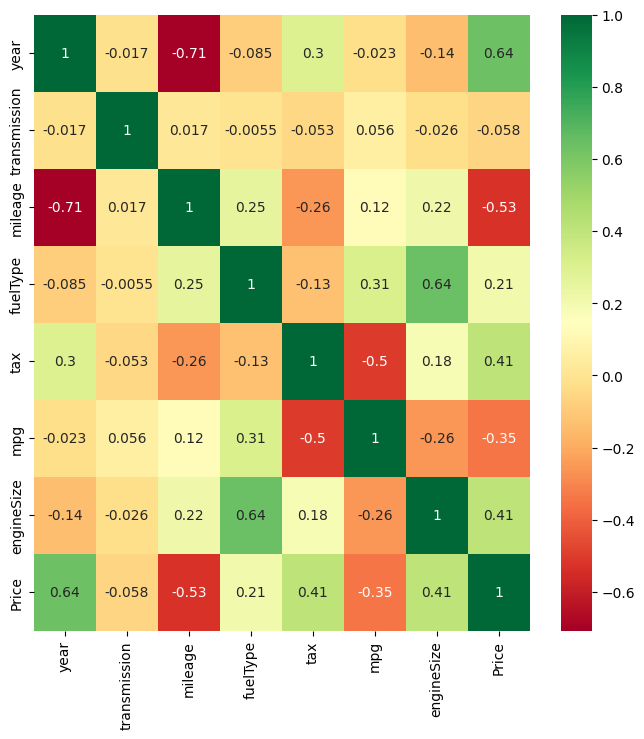

In [12]:
corrmat=pre_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(8,8))
#plot heat map
g=sns.heatmap(pre_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

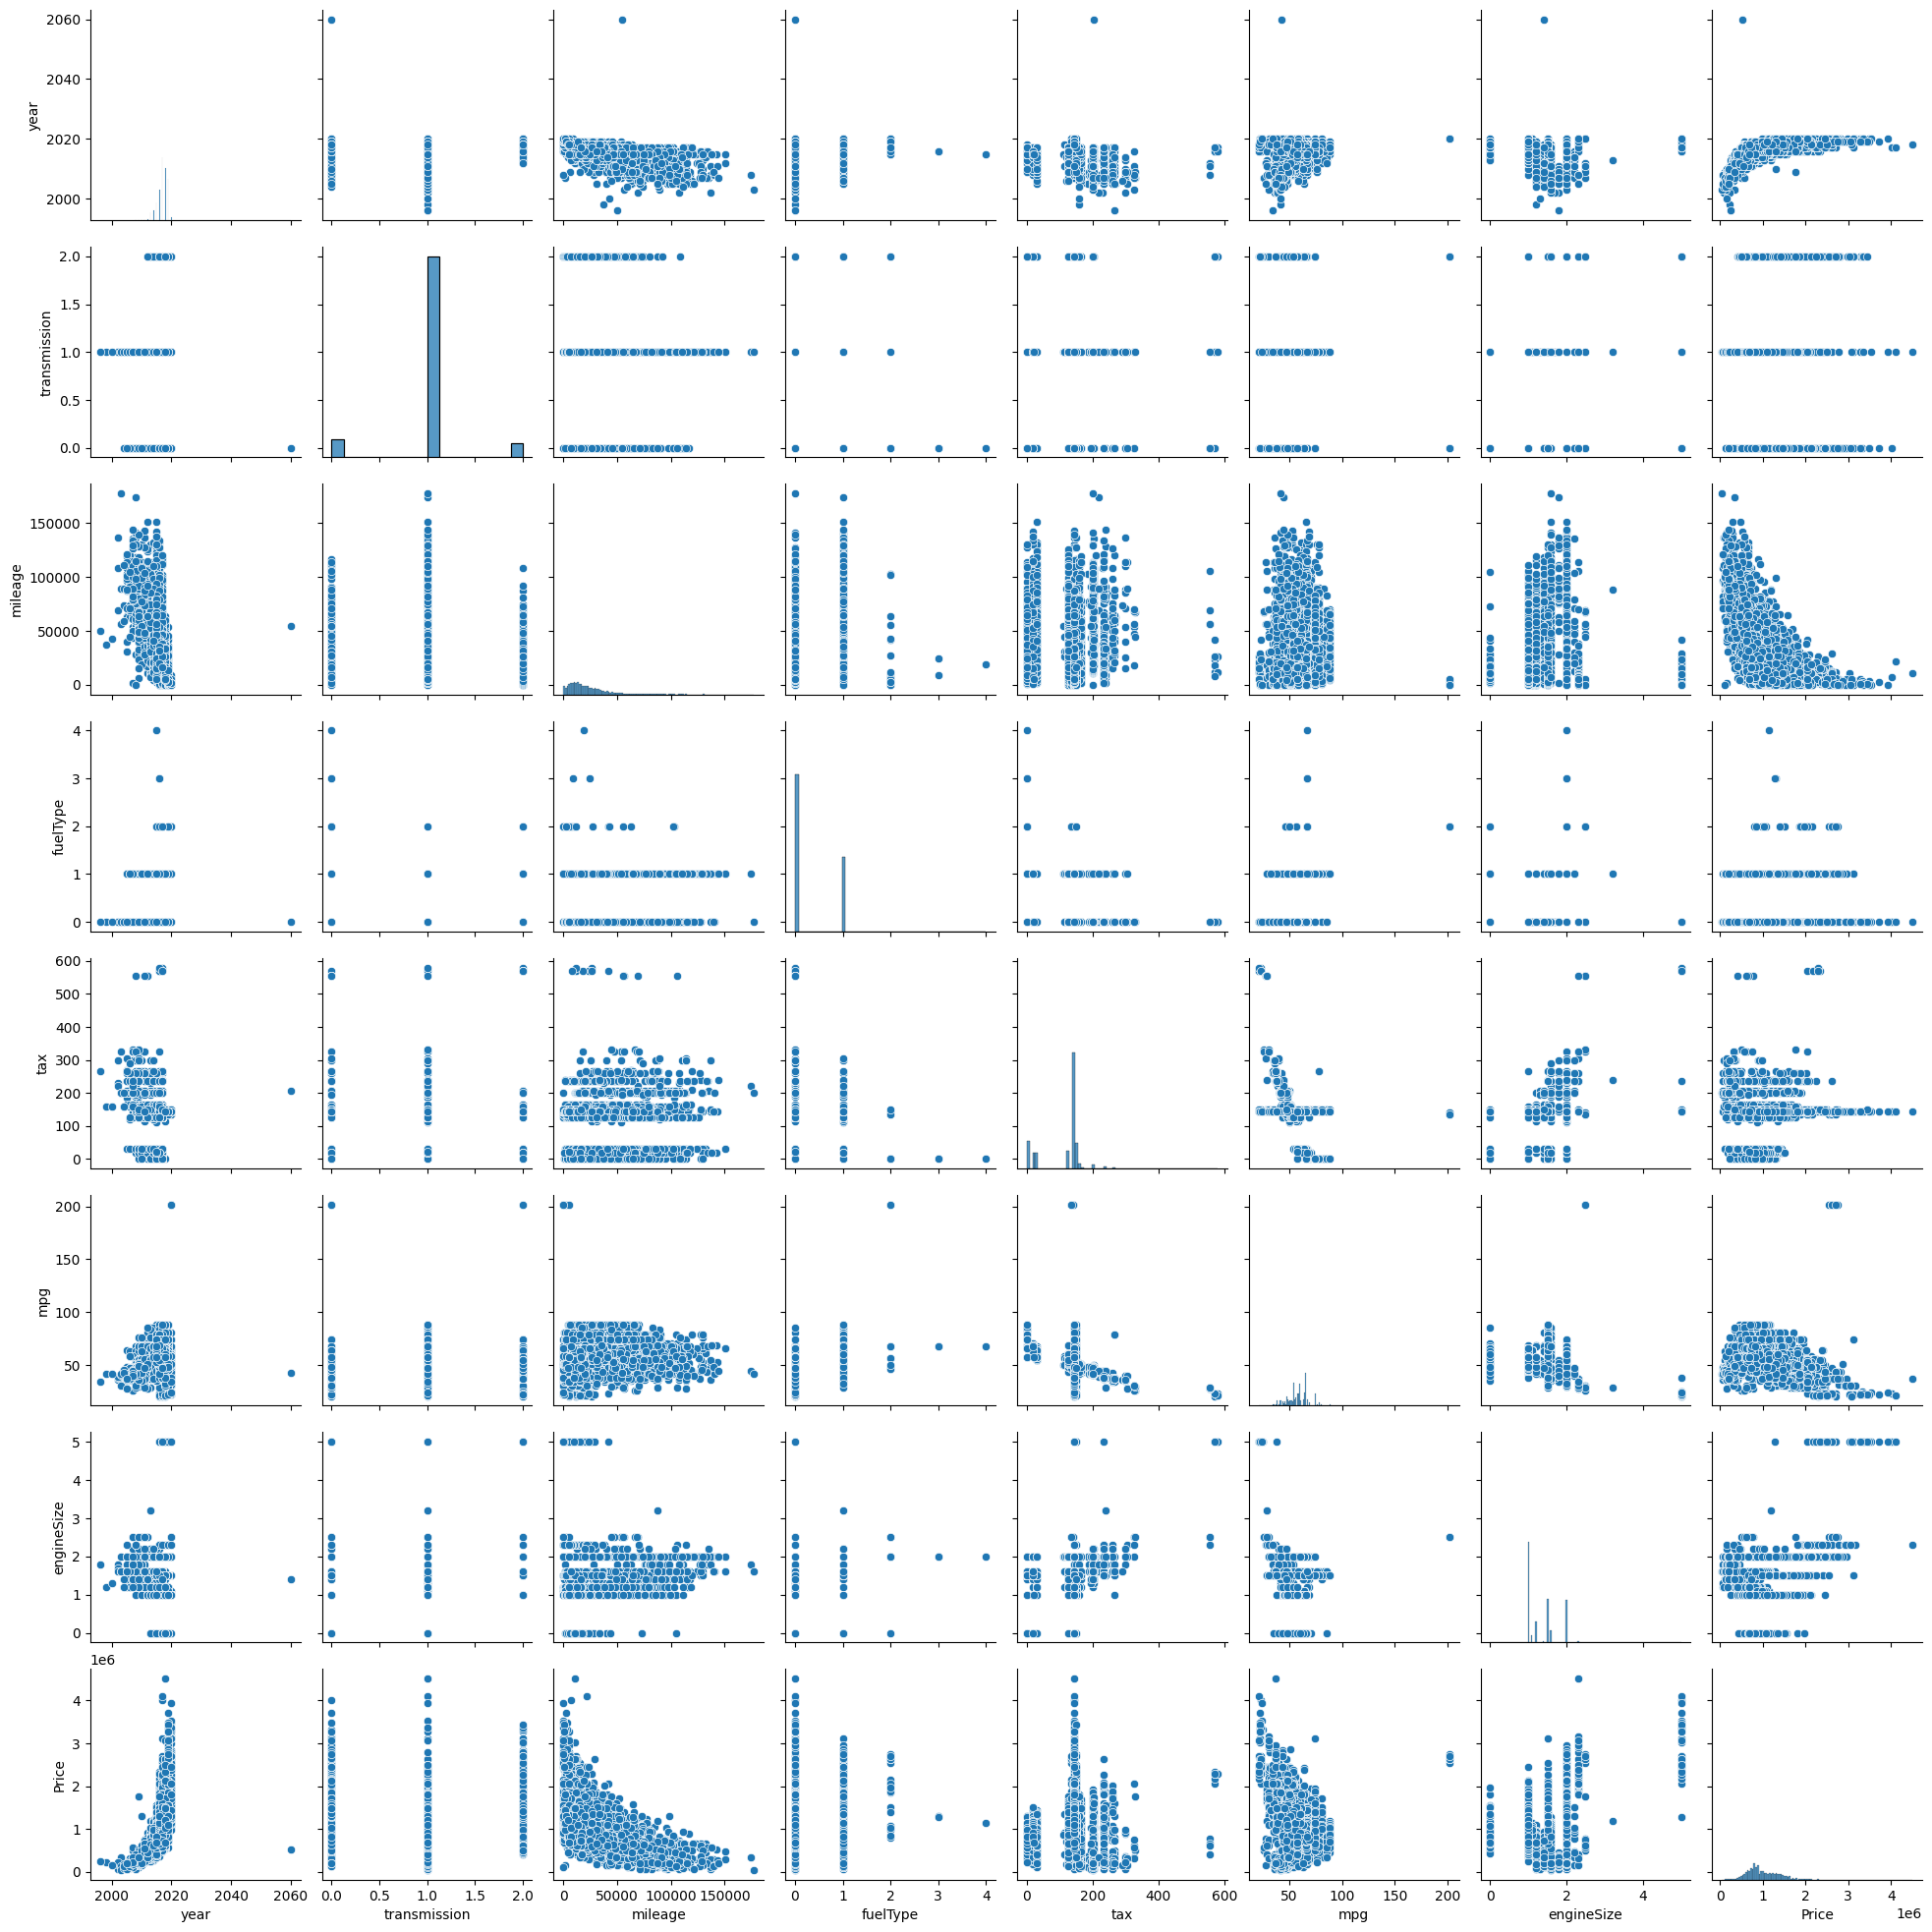

In [12]:
sns.pairplot(pre_dataset)

# Splitting data into features and labels

In [13]:
x = dataset.drop(['model','Price'], axis =1).values
y = dataset['Price']
y

0         984000.0
1        1148000.0
2        1066000.0
3        1435000.0
4        1353000.0
           ...    
17961     737918.0
17962     614918.0
17963     819918.0
17964     680518.0
17965     680518.0
Name: Price, Length: 17966, dtype: float64

# Standardizing the data

In [14]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [15]:
standardized_x = scaler.transform(x)
standardized_x

array([[ 0.06512772, -2.67003231, -0.38099808, ...,  0.59135805,
        -0.02044162, -0.81138621],
       [ 0.55286624,  0.04135139, -0.73335899, ...,  0.59135805,
        -0.02044162, -0.81138621],
       [ 0.06512772,  0.04135139, -0.56013157, ...,  0.59135805,
        -0.02044162, -0.81138621],
       ...,
       [-0.91034931,  0.04135139, -0.83982222, ..., -1.50505332,
         0.92766777,  0.57636151],
       [ 0.55286624,  0.04135139, -0.94269045, ...,  0.51072684,
        -0.02044162, -0.34880364],
       [-0.91034931,  0.04135139, -0.94269045, ..., -1.47280084,
        -0.02044162, -0.81138621]])

In [16]:
x = standardized_x
y = dataset['Price']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.1, random_state=42)
print(x.shape, x_train.shape, x_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(17966, 7) (16169, 7) (1797, 7)
(17966,) (16169,) (1797,)


# Linear Regresssion

In [18]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(x_train,y_train)

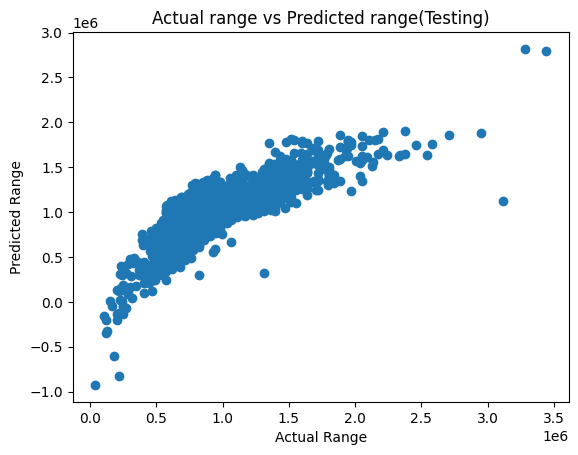

In [19]:
testing_data_prediction=reg.predict(x_test)
plt.scatter(y_test,testing_data_prediction)
plt.xlabel("Actual Range")
plt.ylabel("Predicted Range")
plt.title("Actual range vs Predicted range(Testing)")
plt.show()

# RandomForestRegressor

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs={
    'n_estimators':randint(low=1,high=200),
    'max_features':randint(low=1,high=15),
}

forest_reg=RandomForestRegressor(random_state=42)
rnd_search=RandomizedSearchCV(forest_reg,param_distributions=param_distribs,n_iter=10,cv=5,scoring="neg_mean_squared_error",
                              random_state=42)
rnd_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000216876C9A10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021689C8AF10>},
                   random_state=42, scoring='neg_mean_squared_error')

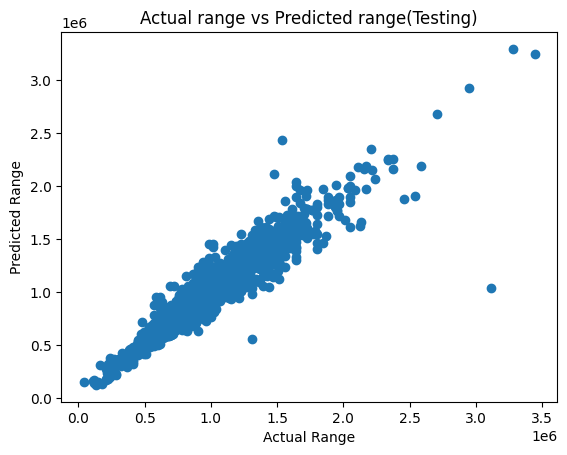

In [33]:
testing_data_prediction1=rnd_search.predict(x_test)
plt.scatter(y_test,testing_data_prediction1)
plt.xlabel("Actual Range")
plt.ylabel("Predicted Range")
plt.title("Actual range vs Predicted range(Testing)")
plt.show()

In [34]:
mae1 = mean_absolute_error(y_test,testing_data_prediction1)
mae1

81199.61381738818

# DecisionTreeRegressor

In [21]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

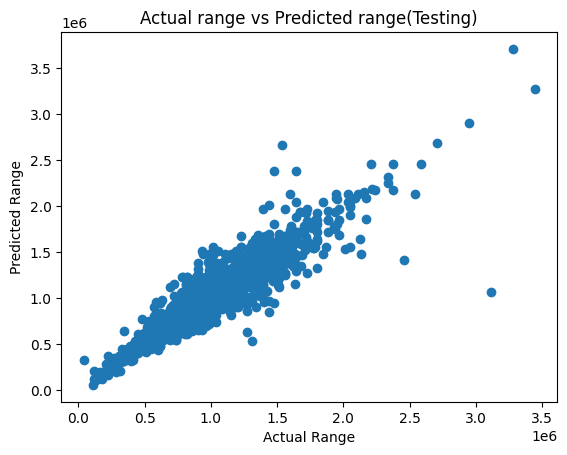

In [22]:
testing_data_prediction1=tree_reg.predict(x_test)
plt.scatter(y_test,testing_data_prediction1)
plt.xlabel("Actual Range")
plt.ylabel("Predicted Range")
plt.title("Actual range vs Predicted range(Testing)")
plt.show()

In [23]:
testing_data_prediction3=tree_reg.predict(x_test)
mae2 = mean_absolute_error(y_test,testing_data_prediction3)
mae2

99716.68484511224

# XGB regressor

In [24]:
# Load the model
xgb_model = XGBRegressor()

In [25]:
# Fit our training data into the model
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

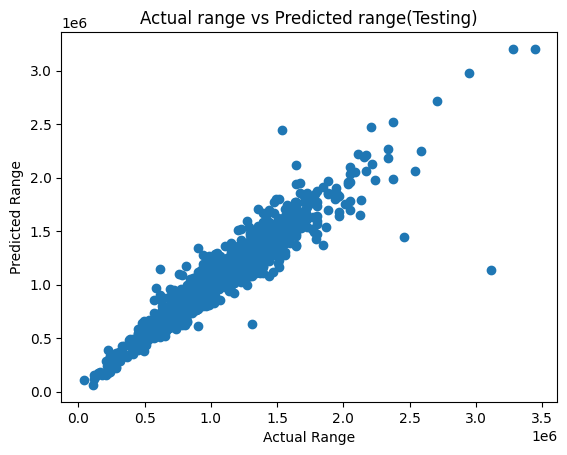

In [26]:
testing_data_predictions=xgb_model.predict(x_test)
plt.scatter(y_test,testing_data_predictions)
plt.xlabel("Actual Range")
plt.ylabel("Predicted Range")
plt.title("Actual range vs Predicted range(Testing)")
plt.show()

# Model Evaluation

In [27]:
# Prediction on training data

training_data_pred = xgb_model.predict(x_train)

#R2 score on training data
score_1 = metrics.r2_score(y_train, training_data_pred)

# Mean absolute error 
mae = metrics.mean_absolute_error(y_train, training_data_pred)

print('R2 score on training data : ',score_1)
print('Mean absolute error on training data : ',mae)

R2 score on training data :  0.9531964550121564
Mean absolute error on training data :  60713.85433400721


In [28]:
# Prediction on test data

test_data_pred = xgb_model.predict(x_test)

#R2 score on test data
score_2 = metrics.r2_score(y_test, test_data_pred)

# Mean absolute error 
mae = metrics.mean_absolute_error(y_test, test_data_pred)

print('R2 score on test data : ',score_2)
print('Mean absolute error on test data : ',mae)

R2 score on test data :  0.9116279798537286
Mean absolute error on test data :  74403.8237513912


# Making predictions

In [29]:
input_data = (2015,1,7010,1,20,67.3,1.6)
#Changing the input into numpy array and reshaping
input_changed=np.array(input_data).reshape(1,-1)

#Standardize the input
std_input = scaler.transform(input_changed)

prediction = xgb_model.predict(std_input)
print(prediction)

print('This car price estimation is : ', prediction)

[839775.1]
This car price estimation is :  [839775.1]


# Saving the Model

In [30]:
import joblib

In [31]:
joblib.dump(xgb_model, 'xgb_model.pkl') # Save the model
joblib.dump(scaler, 'scaler.pkl') # save the standard scaler

['scaler.pkl']